In [1]:
%pylab inline
%run ../utils.py

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = get_data()

In [16]:
from matplotlib.colors import LogNorm
import seaborn as s
s.set(rc={'image.cmap': "jet"})
config_plots(rcParams)

#0 Data

For the illustration I'll use one ISS data run. 
Here is the exposure times for the sample 

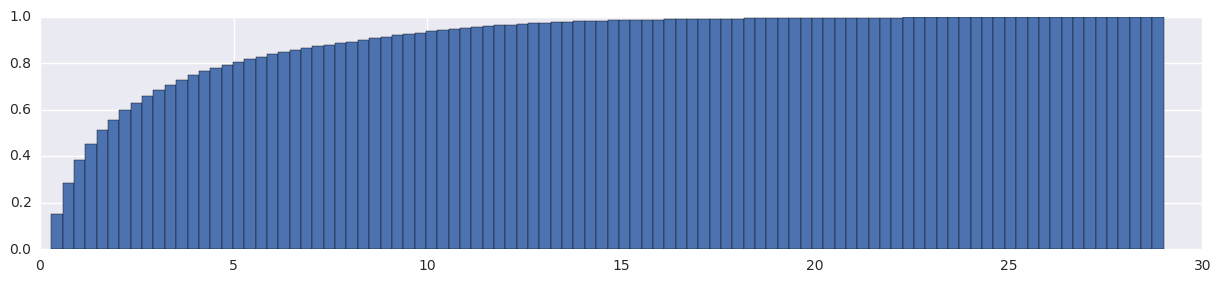

In [4]:
figsize(15,3)
data['Rcutoff'][data['Rcutoff']>0].hist(bins=np.linspace(0,29,100), cumulative=True, normed=True)
figsize(8,6)

#1 Rigidity variables are there for four fit geometries:

In [5]:
variablesR = {
    "R":     "Inner tracker Rigidity",
    "RUp":   "Inner tracker (upper half) Rigidity",
    "RDown": "Inner tracker (lower half) Rigidity",
    "RL1":   "Layer1 + Inner tracker Rigidity",
}

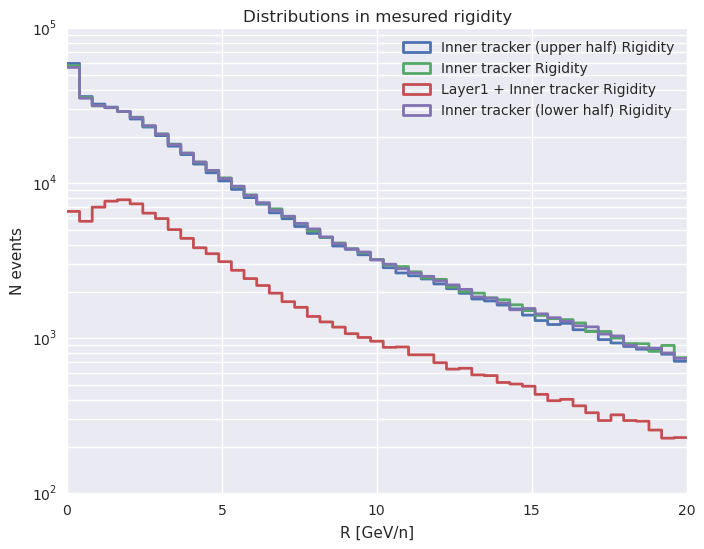

In [6]:
for v,l in variablesR.iteritems():
    data[v][data[v]>0].hist(bins=np.linspace(0,20,50), histtype="step", lw=2, label=l) 
yscale("log"); xlabel("R [GeV/n]"); ylabel("N events"); title("Distributions in mesured rigidity")
legend()

   * As expected, the efficiency for the Layer1+Inner geometry is lower than the Inner geometries alone.

#2 The track fit $\chi^2$ for the four  geometries:

In [9]:
variablesChi = {
    "ChiQ":     "Inner tracker",
    "ChiQUp":   "Inner tracker (upper half)",
    "ChiQDown": "Inner tracker (lower half)",
    "ChiQL1":   "Layer1 + Inner tracker",
}

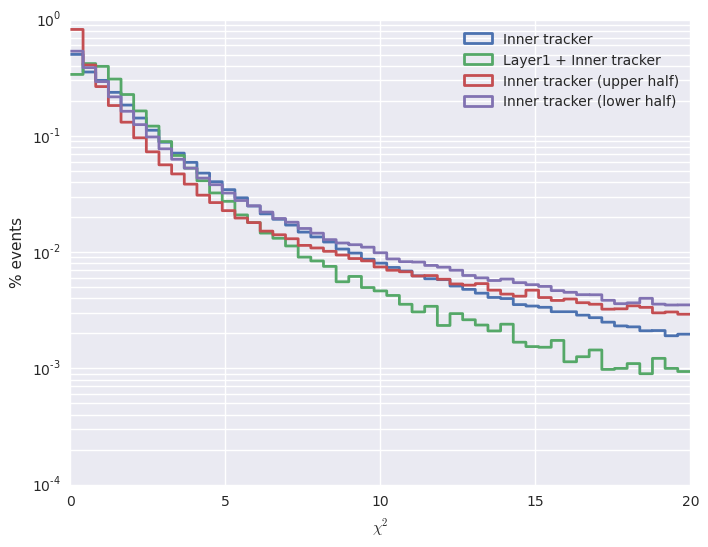

In [12]:
for v,l in variablesChi.iteritems():
    data[v][data[v]>0].hist(bins=np.linspace(0,20,50), histtype="step", lw=2, label=l, normed=True) 
xlabel("$\\chi^2$"), ylabel("% events")
yscale("log")
legend()

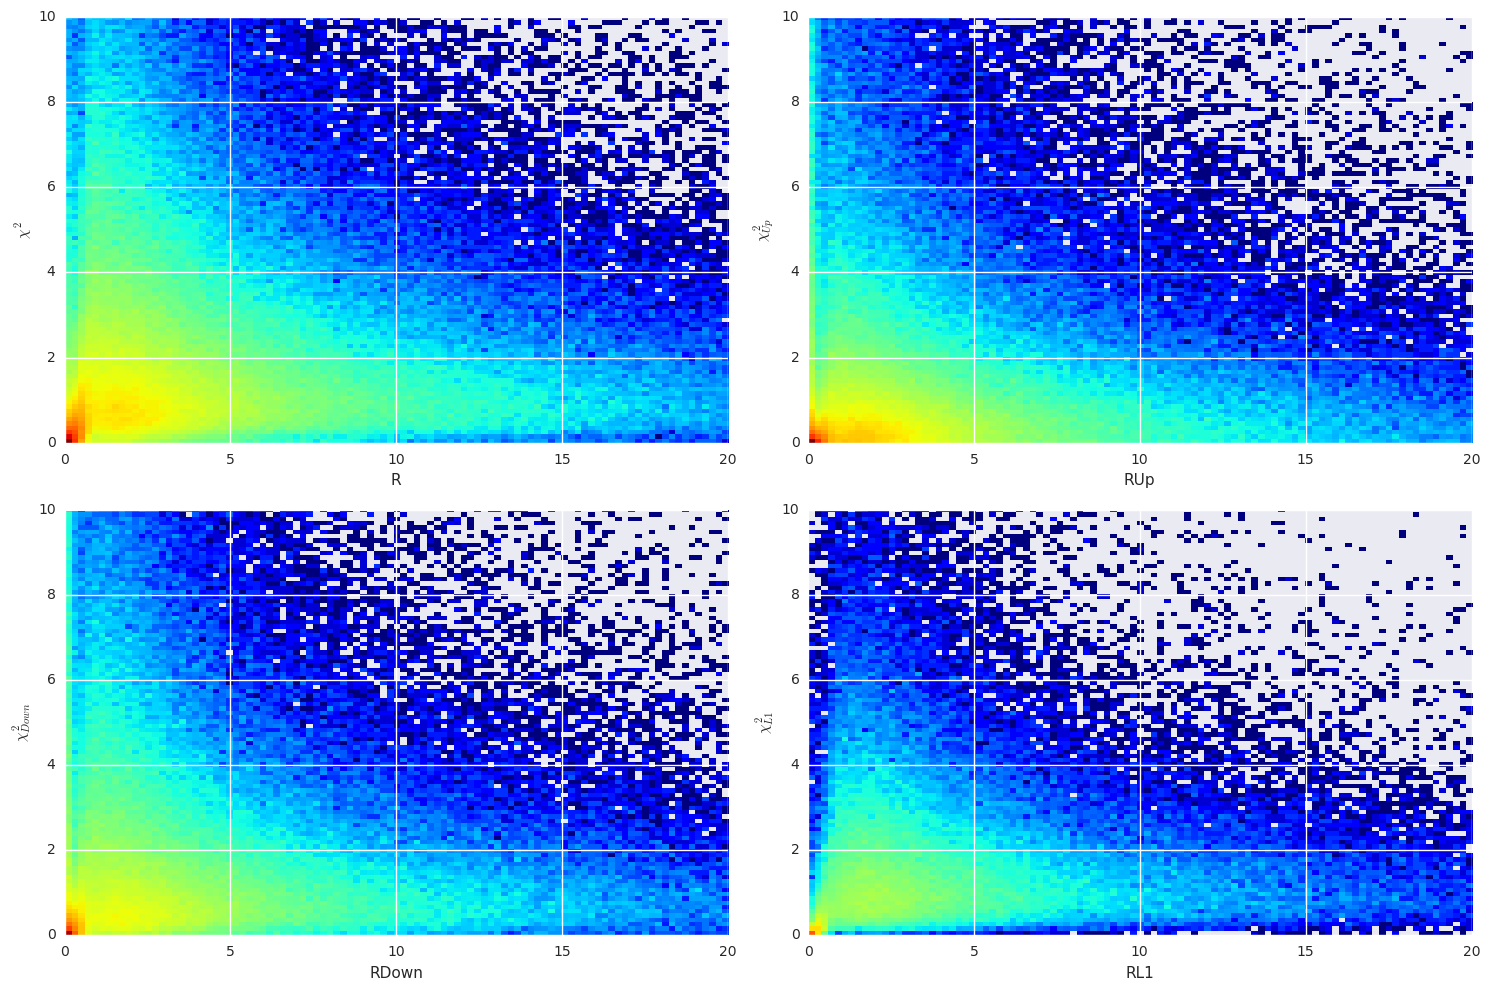

In [23]:
figsize(15,10)
for n, suff in enumerate(["","Up", "Down", "L1"]):
    subplot(2,2,n+1)
    idx = data['R'+suff] > 0
    hist2d(data['R'+suff][idx], data['ChiQ'+suff][idx], 
           bins=[np.linspace(0,20,100),np.linspace(0,10,100)],
           norm=LogNorm(vmin=1,vmax=10**4));
    xlabel("R"+suff); ylabel("$\\chi^2_{{{0}}}$".format(suff))
tight_layout()